In [6]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##cargar archivo excel

In [7]:
file_path = "/content/PRUEBA ANALISTA DE OPERACIONES copia.xlsx"
df = pd.read_excel(file_path)

## calcular estadisticas descriptivas

In [8]:
precio_medio = df['PRECIO DE TRABAJO'].mean()
precio_mediana = df['PRECIO DE TRABAJO'].median()
precio_moda = df['PRECIO DE TRABAJO'].mode()             # revisar este para mejor visualizacion

precio_medio, precio_mediana, precio_moda

(52897.61392188864,
 39176.0,
 0    41161
 Name: PRECIO DE TRABAJO, dtype: int64)

## graficos

In [9]:
sns.set(style="whitegrid")

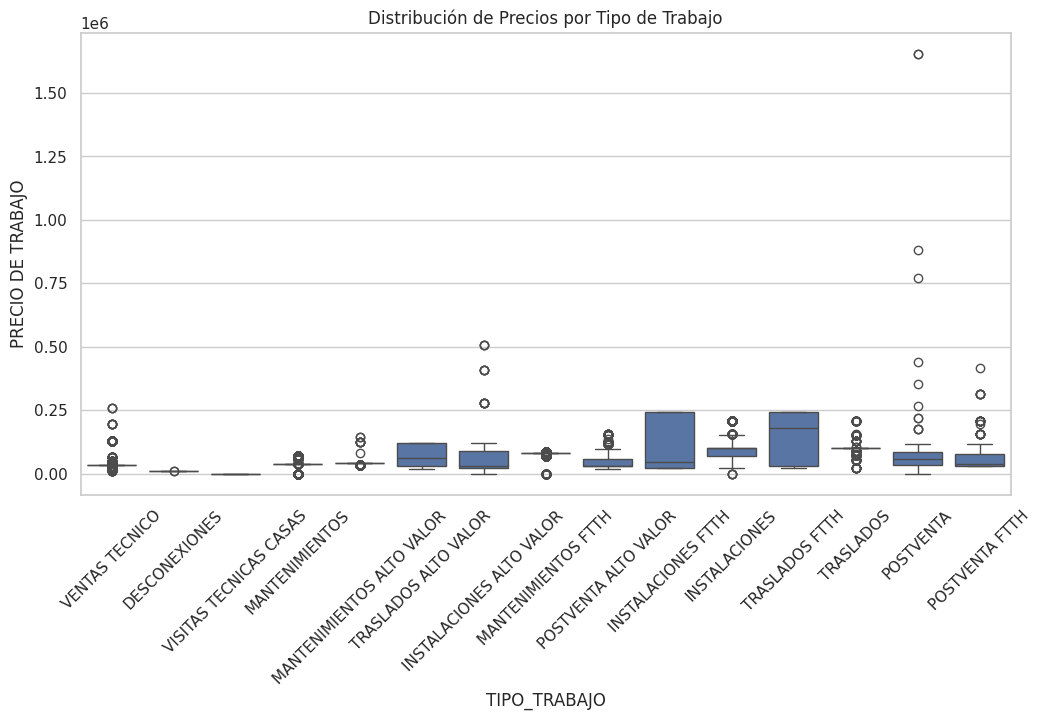

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = "TIPO_TRABAJO", y = "PRECIO DE TRABAJO", data=df)
plt.title("Distribución de Precios por Tipo de Trabajo")
plt.xticks(rotation=45)
plt.show()

## convertir fechas a datetime y filtrar trabajos en el ultimo mes

In [11]:
df['FECHA'] = pd.to_datetime(df['FECHA'])

from datetime import datetime, timedelta

one_month_ago = datetime.now() - timedelta(days=30)
recent_jobs = df[df['FECHA'] > one_month_ago]

recent_jobs

,REGIONAL,CIUDAD,CODTRABAJO,FECHA,CUENTA,ORDEN,CANTIDAD,NOMBRE TECNICO REAL,CEDULA TECNICO REAL,TIPO_TRABAJO,PRECIO DE TRABAJO,TIPO DE MOVIL,ESQUEMA DE TRABAJO,COORDINADOR


## analisis descriptivo

## calcular el total, promedio y desviacion estandar de precios de trabajo por ciudad

In [12]:
# estadisticas descriptivas

ciudad_total = df.groupby('CIUDAD')['PRECIO DE TRABAJO'].sum()
ciudad_promedio = df.groupby('CIUDAD')['PRECIO DE TRABAJO'].mean()
ciudad_desviacion = df.groupby('CIUDAD')['PRECIO DE TRABAJO'].std()

ciudad_total, ciudad_promedio, ciudad_desviacion

(CIUDAD
 BOGOTA           3416999527
 BUCARAMANGA      1012318873
 VILLAVICENCIO     787551569
 YOPAL             357903767
 Name: PRECIO DE TRABAJO, dtype: int64,
 CIUDAD
 BOGOTA           51908.784040
 BUCARAMANGA      52020.497071
 VILLAVICENCIO    55015.827384
 YOPAL            61856.855686
 Name: PRECIO DE TRABAJO, dtype: float64,
 CIUDAD
 BOGOTA           47439.978111
 BUCARAMANGA      52314.109070
 VILLAVICENCIO    55595.151559
 YOPAL            63314.701668
 Name: PRECIO DE TRABAJO, dtype: float64)

## generar graficos de numero de trabajos por tecnico

In [13]:
sns.set(style="whitegrid")



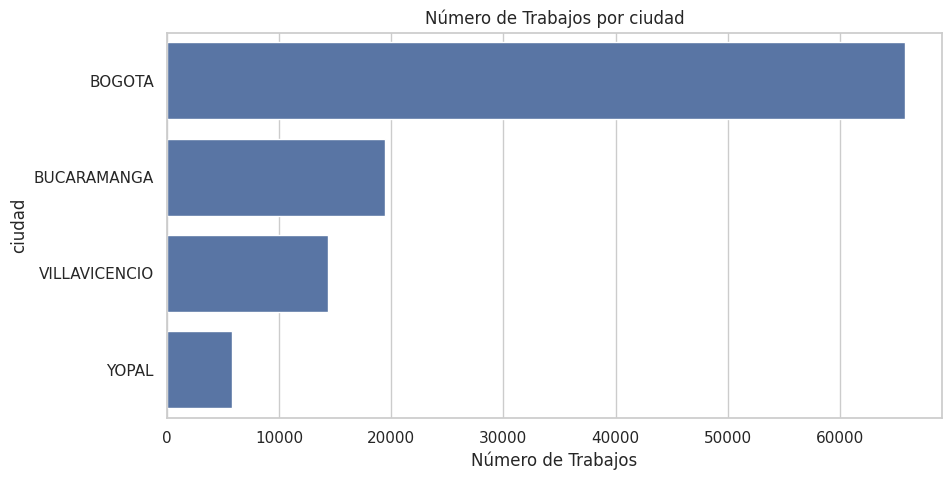

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(y= 'CIUDAD', data=df, order=df['CIUDAD'].value_counts().index)
plt.title("Número de Trabajos por ciudad")
plt.xlabel("Número de Trabajos")
plt.ylabel("ciudad")
plt.show()

## limpieza de datos

In [15]:
df_clean = df.dropna()
df

,REGIONAL,CIUDAD,CODTRABAJO,FECHA,CUENTA,ORDEN,CANTIDAD,NOMBRE TECNICO REAL,CEDULA TECNICO REAL,TIPO_TRABAJO,PRECIO DE TRABAJO,TIPO DE MOVIL,ESQUEMA DE TRABAJO,COORDINADOR
0,CENTRO,BOGOTA,VENTEC,2023-07-01,15589183,380534979,2,JEISON ADAN MOSQUERA RUIZ,1087782391,VENTAS TECNICO,20028,MOTO DOBLE,HFC,NaN
1,CENTRO,BOGOTA,NROUTER,2023-07-01,15434166,380582904,2,ALEJANDRO MARIO HERNANDEZ PERTUZ,1143432760,VENTAS TECNICO,33090,MOTO DOBLE,HFC,NaN
2,CENTRO,BOGOTA,NROUTER,2023-07-01,15581974,380597816,2,JORGE ENRIQUE RENZA ALVIZ,1130588089,VENTAS TECNICO,33090,MOTO DOBLE,HFC,NaN
3,CENTRO,BOGOTA,NROUTER,2023-07-01,15634211,380592700,2,EYSON FERNANDO IJAJI SAMBONI,1107077888,VENTAS TECNICO,33090,MOTO DOBLE,HFC,NaN
4,CENTRO,BOGOTA,NROUTER,2023-07-01,15589183,380534979,2,JEISON ADAN MOSQUERA RUIZ,1087782391,VENTAS TECNICO,33090,MOTO DOBLE,HFC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105383,ORIENTE,VILLAVICENCIO,ARTOC96,2023-07-31,24820037,8798206,1,CURREA HERRERA HUGO ALFONSO,1121871475,MANTENIMIENTOS,39176,MOVIL ARREGLOS,FTTH,NaN
105384,CENTRO,BOGOTA,NDESCO,2023-07-31,16170421,381960297,1,CAMILLO SPECIA CARVAJAL,1126625677,DESCONEXIONES,8746,MOTO SENCILLA,HFC,NaN
105385,CENTRO,BOGOTA,NFTICTNC,2023-07-31,19680087,382136645,1,DEIMER ALONSO ARTUZ JARAMILLO,1073990828,INSTALACIONES FTTH,178192,MOTO DOBLE,FTTH,NaN
105386,CENTRO,BOGOTA,NITVCA,2023-07-31,25973369,382203547,1,CARLOS EDUARDO DAJOME VALENCIA,1023952580,INSTALACIONES ALTO VALOR,74622,MOTO DOBLE,HFC,NaN


## Crear un gráfico de dispersión (scatter plot) que muestre la relación entre la cantidad de trabajos y el precio de trabajo por tipo de trabajo:

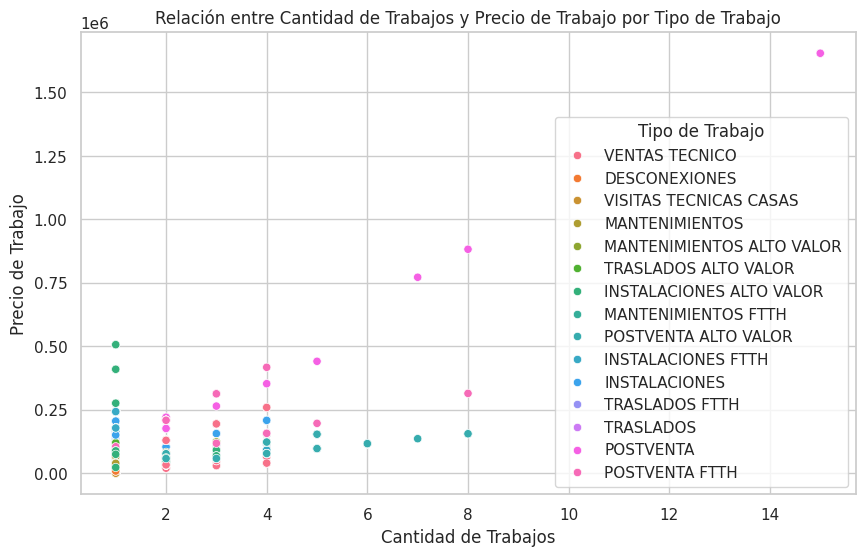

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CANTIDAD', y='PRECIO DE TRABAJO', hue='TIPO_TRABAJO', data=df)
plt.title("Relación entre Cantidad de Trabajos y Precio de Trabajo por Tipo de Trabajo")
plt.xlabel("Cantidad de Trabajos")
plt.ylabel("Precio de Trabajo")
plt.legend(title="Tipo de Trabajo")
plt.show()

## Utilizar una regresión lineal para predecir el precio de trabajo basado en la cantidad y el tipo de trabajo:

In [17]:
## librerias para regresion lineal

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

In [18]:
## preprocesamiento de datos

X= df[['CANTIDAD', 'TIPO_TRABAJO','ESQUEMA DE TRABAJO','TIPO DE MOVIL']]
y= df['PRECIO DE TRABAJO']

In [19]:
# One-hot encoding para la columna 'TIPO_TRABAJO'

column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['TIPO_TRABAJO', 'ESQUEMA DE TRABAJO', 'TIPO DE MOVIL'])
    ],
    remainder='passthrough')




In [20]:
# Dividir datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Crear y entrenar el modelo de regresión lineal

pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['TIPO_TRABAJO',
                                                   'ESQUEMA DE TRABAJO',
                                                   'TIPO DE MOVIL'])])),
                ('regressor', LinearRegression())])

In [22]:
# Evaluar el modelo

r2_score = pipeline.score(X_test, y_test)
r2_score

0.2596005603530852

##Realizar análisis estadísticos y crear visualizaciones avanzadas.

In [23]:
df.dropna(inplace=True)

In [24]:
#Analisis estadisticos

stats = df.groupby('TIPO_TRABAJO')['PRECIO DE TRABAJO'].describe()
print(stats)

Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

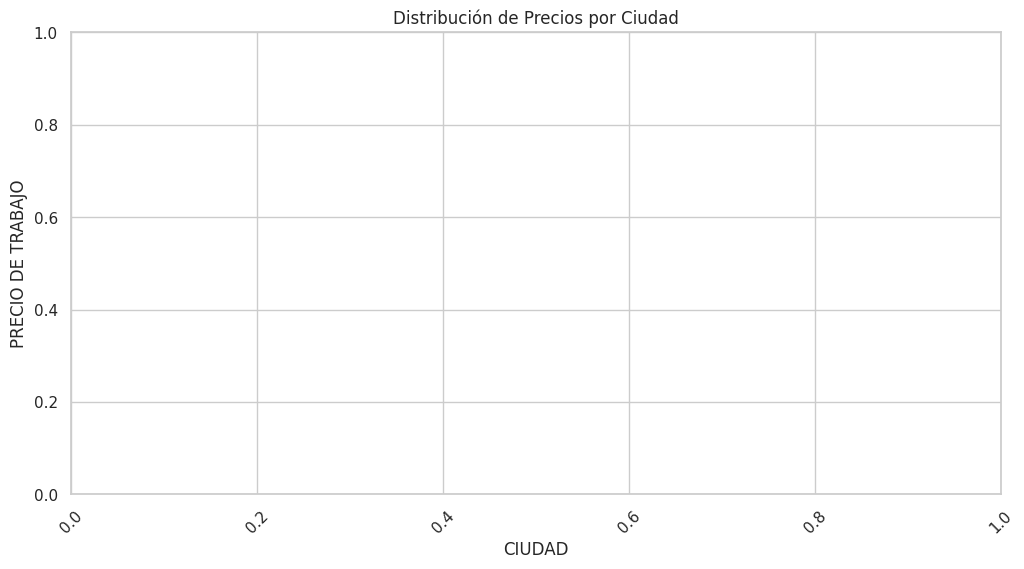

In [34]:
#Visualización de Datos

plt.figure(figsize=(12, 6))
sns.barplot(x="CIUDAD", y="PRECIO DE TRABAJO", data=df)
plt.title('Distribución de Precios por Ciudad')
plt.xlabel('CIUDAD')
plt.ylabel('PRECIO DE TRABAJO')
plt.xticks(rotation=45)
plt.show()

In [38]:
print(X.head())
print(y.head())
print(X.shape)
print(y.shape)

Empty DataFrame
Columns: [CANTIDAD, TIPO_TRABAJO]
Index: []
Series([], Name: PRECIO DE TRABAJO, dtype: int64)
(0, 2)
(0,)


In [41]:
y=y.dropna()
y=y[X.index]


In [47]:

y = pd.DataFrame(y, columns=['PRECIO DE TRABAJO'],drop_first=True)

TypeError: DataFrame.__init__() got an unexpected keyword argument 'drop_first'

In [43]:
#Regresion lineal

X= df[['CANTIDAD', 'TIPO_TRABAJO']]
y= df['PRECIO DE TRABAJO']

column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['TIPO_TRABAJO'])
    ],
    remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)
r2_score = pipeline.score(X_test, y_test)
print(f'R^2 Score: {r2_score}')

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.